# Gait Analysis using SKDH

This example uses accelerometer data to compute gait parameters. Data from [Axivity](https://axivity.com/) sensors are saved in `.cwa` format.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import skdh

from datetime import datetime

In [2]:
data = skdh.io.ReadCwa().predict(file="example_data.cwa")

data

{'time': array([1.57001664e+09, 1.57001664e+09, 1.57001664e+09, ...,
        1.57002894e+09, 1.57002894e+09, 1.57002894e+09]),
 'fs': 100.0,
 'temperature': array([30.55378779, 30.55378779, 30.55378779, ..., 35.0095485 ,
        35.0095485 , 35.0095485 ]),
 'accel': array([[-0.625   , -0.046875, -0.8125  ],
        [ 0.359375,  0.078125,  0.875   ],
        [ 0.390625,  0.09375 ,  0.921875],
        ...,
        [ 0.328125, -0.53125 ,  0.765625],
        [ 0.3125  , -0.546875,  0.796875],
        [ 0.296875, -0.53125 ,  0.796875]])}

## Data
The data is timestamped in Unix time and contains the sampling frequecy of $100 Hz$, the temperature and the acceleration in the three direction $x$, $y$ and $z$.


In [3]:
datetime.fromtimestamp(data['time'][0])

datetime.datetime(2019, 10, 2, 14, 43, 55, 490000)

In [4]:
datetime.fromtimestamp(data['time'][-1])

datetime.datetime(2019, 10, 2, 18, 8, 56, 109833)

## Visualisation

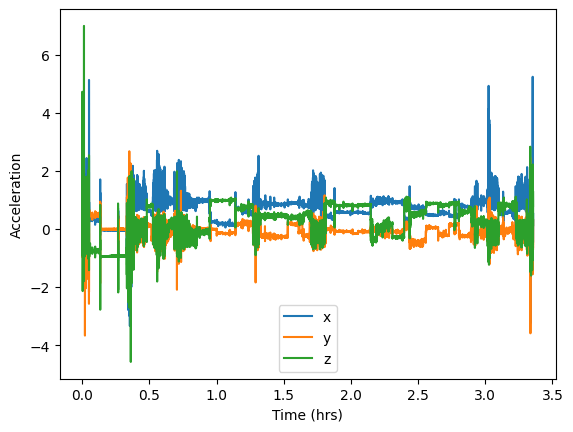

In [5]:
time = np.arange(data['accel'].shape[0]) / (data['fs'] * 3600)
plt.plot(time, data['accel'])
plt.xlabel('Time (hrs)')
plt.ylabel('Acceleration')
plt.legend(['x', 'y', 'z'])


## Zoom In

(0.25, 0.3)

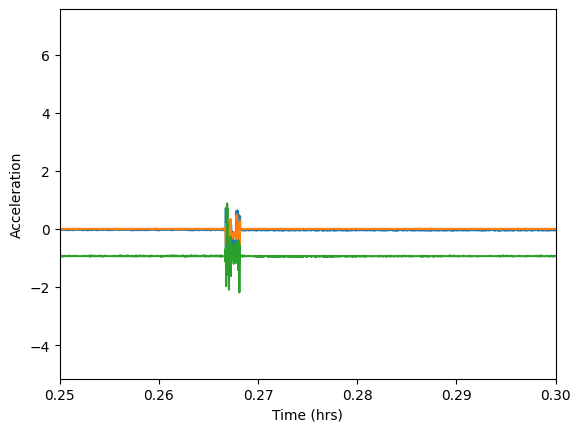

In [6]:
plt.plot(time, data['accel'])
plt.xlabel('Time (hrs)')
plt.ylabel('Acceleration')
plt.xlim([.25, .3])

(-2.5, 3.0)

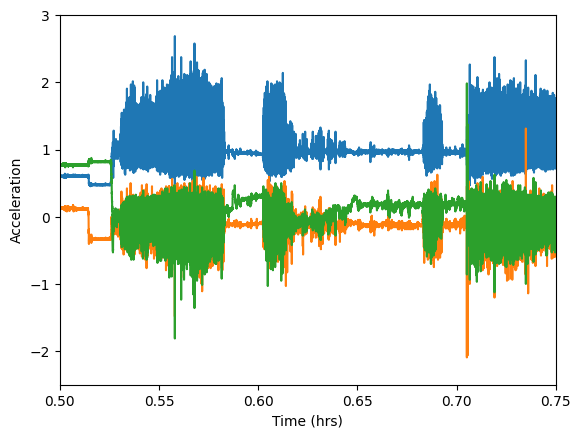

In [7]:
plt.plot(time, data['accel'])
plt.xlabel('Time (hrs)')
plt.ylabel('Acceleration')
plt.xlim([.5, .75])
plt.ylim([-2.5, 3])

## Gait Analysis

In [8]:
pipeline=skdh.Pipeline()
pipeline.add(skdh.io.ReadCwa())
pipeline.add(skdh.preprocessing.CalibrateAccelerometer())
pipeline.add(skdh.gait.GaitLumbar())
res = pipeline.run(file='example_data.cwa')

/home/ftei-dsw/Documents/Research/DSAIL/wearables/wearable-env/lib/python3.10/site-packages/skdh/preprocessing/calibrate.py:162: UserWarning: Less than 72 hours of data (3.356 hours). No Calibration performed
  warn(
/home/ftei-dsw/Documents/Research/DSAIL/wearables/wearable-env/lib/python3.10/site-packages/skdh/gait/core.py:514: UserWarning: height not provided, not computing spatial metrics
  warn("height not provided, not computing spatial metrics", UserWarning)


In [9]:
for k in res.keys():
    print(k)

ReadCwa
CalibrateAccelerometer
GaitLumbar


In [10]:
for k in res['GaitLumbar'].keys():
    print(k)

Day N
Date
Processing Start Hour
Processing End Hour
Day Start Timestamp
Day End Timestamp
Bout N
Bout Starts
Bout Duration
Bout Steps
Gait Cycles
IC Time
debug:mean step freq
debug:v axis est
debug:ap axis est
Turn
stride time
stride time asymmetry
stance time
stance time asymmetry
swing time
swing time asymmetry
step time
step time asymmetry
initial double support
initial double support asymmetry
terminal double support
terminal double support asymmetry
double support
double support asymmetry
single support
single support asymmetry
m2 delta h
m2 delta h prime
step length
step length asymmetry
stride length
stride length asymmetry
gait speed
gait speed asymmetry
cadence
m1 delta h
step length m1
step length m1 asymmetry
stride length m1
stride length m1 asymmetry
gait speed m1
gait speed m1 asymmetry
intra-step covariance - V
intra-stride covariance - V
harmonic ratio - V
stride SPARC
bout:phase coordination index
bout:gait symmetry index
bout:step regularity - V
bout:stride regularit